# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [33]:
# step 1. Importing modules, loading reviewing data
# The project been done with detailed approach (step-by-step) and with a lot of comments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = 'train.csv'
df = pd.read_csv(file)

In [21]:
# step 2. Exploring data before using funcs and methods
display(df.head(10))
display(df.info())
display(df.describe())
df.shape
df.nunique()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


None

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


ID         333
crim       332
zn          25
indus       68
chas         2
nox         77
rm         308
age        260
dis        295
rad          9
tax         59
ptratio     42
black      237
lstat      310
medv       192
dtype: int64

#### 1. results of step 2
1. we have dataset with 15 variable consisting of 333 data samples.
2. all data samples are given in number (floats) formats.
3. there are no any missing data in data samples.
4. One of data variable - is artificial ID and will be set as index in futher works.
5. Max(ID) = 506 > 333 => it might be that some data were missed in original file.

In [80]:
# Step 3. setting ID as index
df = pd.read_csv(file)
df.set_index('ID', inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


#### 2. analyzing data before statistical calcs
1. **variable interpretation:**
   1. crim ~ number of crime accidents per 1 person in different towns => ID - indicates town in BOSTON???
   1. zn ~ proportion of residental land for big lots (over 25ksqft). Data given in units, and need to be converted to %
   1. indus ~ proportion of non-retail business acres per town (as base - business acres or whole city???)
   1. chas ~ Charles River dummy (1 - near river, 0 - not). From here some problems issued: id correspond to tract or town? It could be that some of towns bounds to the river.
   1. nox - nitrogen oxides concentration (parts / 1 mln)
   1. rm - avg number of rooms in 1 housing unit (more rm means bigger town)
   1. age - proportion of owner-occupied old units (prior to 1940).
   1. dis - mean distance to 5 Boston employment centres
   1. rad - accessibility index to radial highways
   1. tax - full-value property-tax rate per 10k USD (I suppose it given in USD). Recalcs could be made.
   1. ptratio - pupil-teacher ratio.
   1. black - adjusted proportion of blacks in town (I didn't understood applied formula, no usage in analysis)
   1. lstat - lower status of population - a kind of cummulative index.
   1. medv - median number of cheap homes (10 000)

2. **Some preliminary thinkings**:
   1. Relatively independent variables: geographical (chas, dis, rad), ecological (nox), town size and type (age, ptratio), gov.policy indicators (tax, indus)
   2. Social and economic dependent indicators: crime, zn, lstat, medv.
   3. Homogeneous variable groups (by meaning):
      1. city size and business activity: village->city {zn+,indus-,tax+(assuming increasing tax scale),rm+,age-,ptratio+,nox+}
      2. social status: low->high {lstat-, nox-,medv+}
      3. Interesting variables to be analyzed deeply {crime, age}
   
   3. Further data analysis steps:
      
      1. Subset 1 {crime, medv, lstat, ptratio, rm} - I chosed those variable to understand dependency between each of them. One of the questions - how crime depends on rm (which indicate size of the town), and could be low ptratio influence on crime level. Detailed sliced analysis will be applied after first look.
      2. Subset 2 {zn, chas, dis, age, tax} - Here zn could indicate economic growth potential and current activity. Crucial reasons of that could be geographical distance to main activity centers (dis), level of taxes, how city is old (age), is it important to be close to River (logistical issues).


In [81]:
# step 4. variable recalculation (zn, age, tax -> to percent)
#df.loc[:,['zn','age']]
df[['zn','age']] = df[['zn','age']].apply(lambda x: x/100) # apply OR applymap function
df.tax = df.tax.map(lambda x: x/10000) # using map function

In [82]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,0.180,2.31,0,0.538,6.575,0.652,4.0900,1,0.0296,15.3,396.90,4.98,24.0
2,0.02731,0.000,7.07,0,0.469,6.421,0.789,4.9671,2,0.0242,17.8,396.90,9.14,21.6
4,0.03237,0.000,2.18,0,0.458,6.998,0.458,6.0622,3,0.0222,18.7,394.63,2.94,33.4
5,0.06905,0.000,2.18,0,0.458,7.147,0.542,6.0622,3,0.0222,18.7,396.90,5.33,36.2
7,0.08829,0.125,7.87,0,0.524,6.012,0.666,5.5605,5,0.0311,15.2,395.60,12.43,22.9


In [115]:
# step 5. creating mean, median and standart deviation functions
a = [1,2,3,4,5]
import math

def mean_c(a):
    return sum(a)/len(a)

def median_c(a):
    b = sorted(a)
    len_value = len(b)
    if len_value%2 == 0:
        med = (b[int(len_value/2)-1]+b[int(len_value/2)])/2
    else:
        med = b[(len_value)//2]
    return med

def stdv_c(a):
    dv2 = list((x-mean_c(a))**2 for x in a)
    return math.sqrt(sum(dv2)/(len(a)-1))

In [120]:
# step 6. For chosen subsets I've chosen {crime, lstat, ptratio} and {zn, age, tax}
# subset 1.
print('crim variable: ','mean =',mean_c(df['crim']), 'median =',median_c(df['crim']), 'std =',stdv_c(df['crim']))
print('lstat variable: ','mean =',mean_c(df['lstat']), 'median =',median_c(df['lstat']), 'std =',stdv_c(df['lstat']))
print('ptratio variable: ','mean =',mean_c(df['ptratio']), 'median =',median_c(df['ptratio']), 'std =',stdv_c(df['ptratio']))
# subset 2.
print('zn variable: ','mean =',mean_c(df['zn']), 'median =',median_c(df['zn']), 'std =',stdv_c(df['zn']))
print('age variable: ','mean =',mean_c(df['age']), 'median =',median_c(df['age']), 'std =',stdv_c(df['age']))
print('tax variable: ','mean =',mean_c(df['tax']), 'median =',median_c(df['tax']), 'std =',stdv_c(df['tax']))
df[['crim','lstat','ptratio','zn','age','tax']].describe() #- check ok

crim variable:  mean = 3.360341471471471 median = 0.26169000000000003 std = 7.3522718367811075
lstat variable:  mean = 12.515435435435432 median = 10.97 std = 7.067780803585784
ptratio variable:  mean = 18.448048048047994 median = 19.0 std = 2.151821329439083
zn variable:  mean = 0.10689189189189179 median = 0.0 std = 0.22674761796618167
age variable:  mean = 0.682264264264264 median = 0.767 std = 0.2813334360562338
tax variable:  mean = 0.04092792792792783 median = 0.033 std = 0.017084198846058236


,crim,lstat,ptratio,zn,age,tax
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,12.515435,18.448048,0.106892,0.682264,0.040928
std,7.352272,7.067781,2.151821,0.226748,0.281333,0.017084
min,0.006320,1.730000,12.600000,0.000000,0.060000,0.018800
25%,0.078960,7.180000,17.400000,0.000000,0.454000,0.027900
50%,0.261690,10.970000,19.000000,0.000000,0.767000,0.033000
75%,3.678220,16.420000,20.200000,0.125000,0.938000,0.066600
max,73.534100,37.970000,21.200000,1.000000,1.000000,0.071100


In [136]:
# step 7. Creating subsets

df1 = df.loc[:,['crim', 'medv', 'lstat', 'ptratio', 'rm']]
df2 = df.loc[:,['zn', 'chas', 'dis', 'age', 'tax']]
# explanations of selected variables are given in 2.2.3 Markdown above

<Figure size 576x576 with 0 Axes>

<Figure size 864x864 with 0 Axes>

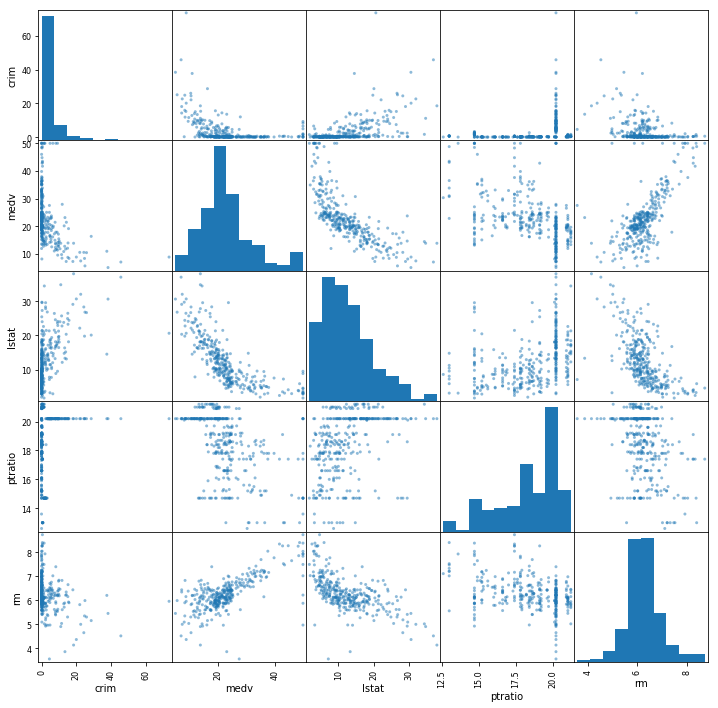

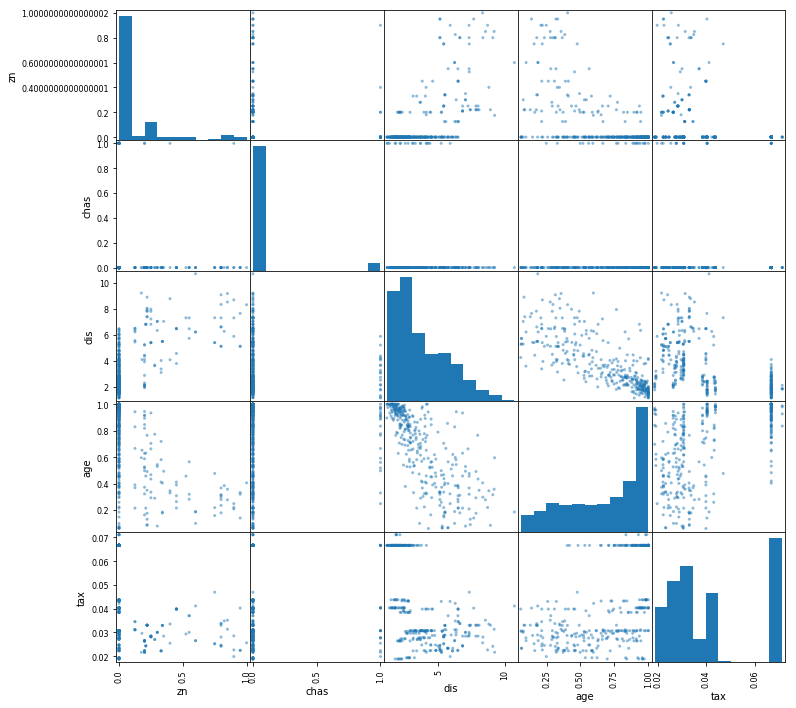

In [140]:
# step 8. Correlation variable-to-variable analysis. First-look. Scatter-matrix
fig = plt.figure(figsize=(12,12))
pd.plotting.scatter_matrix(df1, figsize=(12,12));
pd.plotting.scatter_matrix(df2, figsize=(12,12));

#### 3. Results of step 8
1. **variables distribution**
   1. more or less symmetric density: only rm and medv (mean ~ P50)
   2. left-skewed variables: crim, lstat, zn, dis
   3. light-skewed variables: age, ptratio
   4. Variables with significant outliers: tax (right), zn (left)
   5. variables with small amount of representative data: chas, crim.

2. **correllation (strong and medium) between variables (pairs)**
   1. In subset 1:
      1. positive corr: rm-medv, crim-lstat
      2. negative corr: medv-lstat, rm-lstat, crim-medv
      3. _So: {rm, medv, crim, lstat} variables somehow statictically linked_
   1. In subset 2 (medium and low correlation):
      1. positive corr: dis-zn
      2. negative corr: age-dis
      3. _So: {age, dis, zn} variables somehow statictically linked_

#### 4. Creating subsets with filters to find hidden correlation
criteria 1 (for subset 1): crim, outlier value - 8
criteria 2 (for subset 2): tax, outlier value (left-border) - 6.5%


In [179]:
#Step 9. Creating modified dataframes with criteria split
# for this work I use new df_set

# subset 1.
df1_lowcrim = df.loc[df['crim']<8,['medv', 'lstat', 'ptratio', 'rm']]
df1_basecrim = df.loc[df['crim']>=8,['medv', 'lstat', 'ptratio', 'rm']]

# subset 2. Criteria 1
df2_basetax = df.loc[df['tax']<0.065,['zn', 'chas', 'dis', 'age']]
df2_hightax = df.loc[df['crim']>=0.065,['zn', 'chas', 'dis', 'age']]



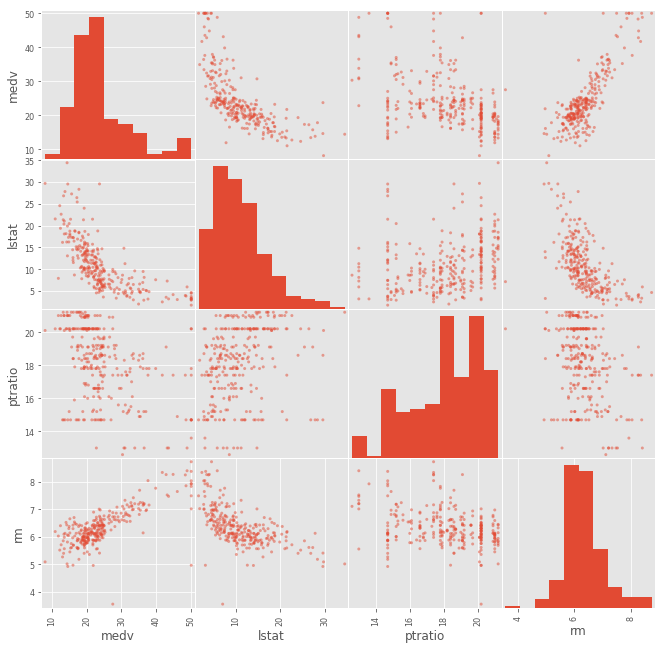

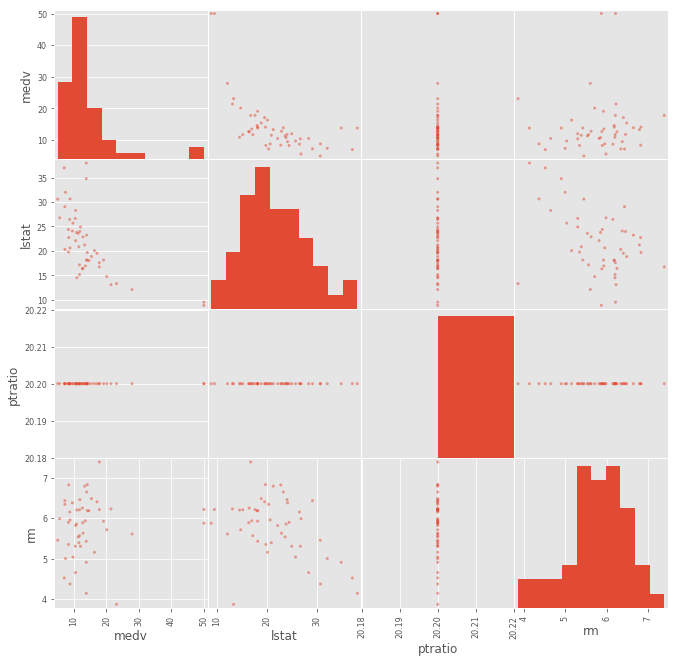

In [183]:
# step 10. Scatter plots. Subset 1
pd.plotting.scatter_matrix(df1_lowcrim, figsize=(11,11));
pd.plotting.scatter_matrix(df1_basecrim, figsize=(11,11));

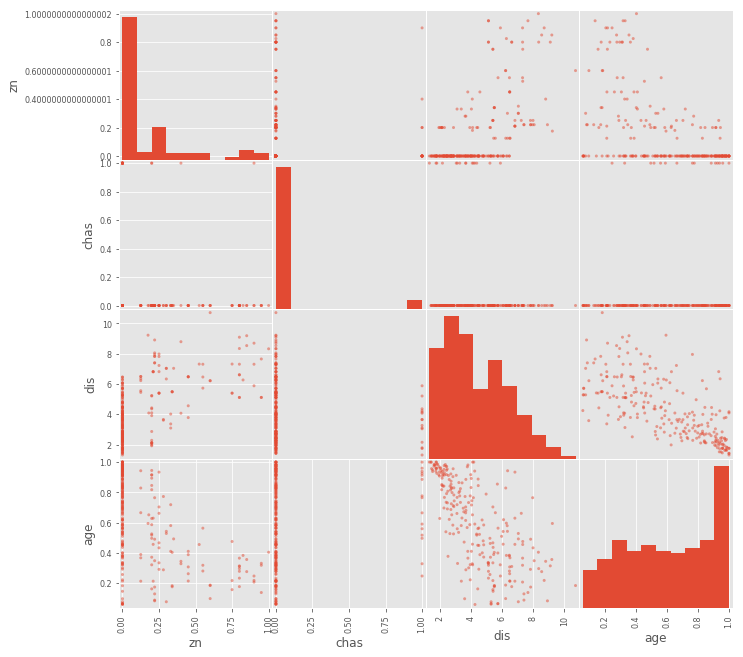

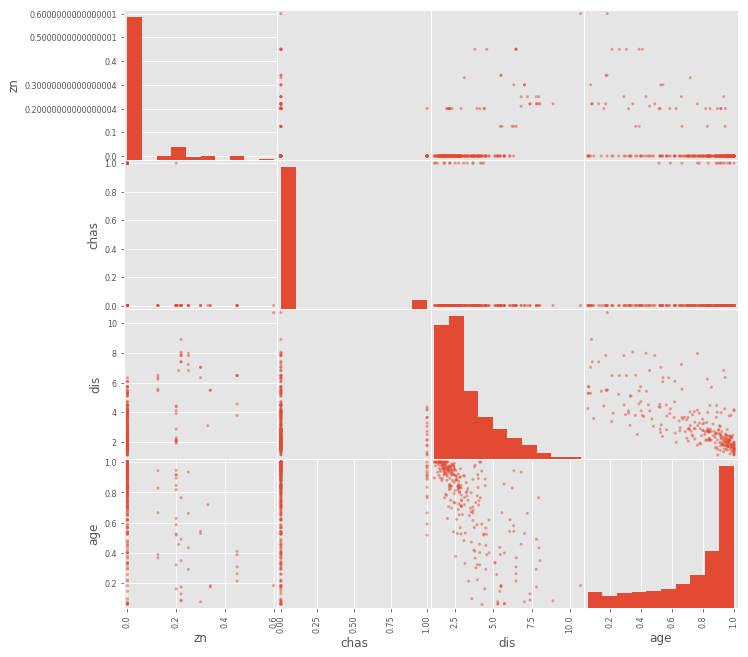

In [184]:
# step 11. Scatter plots. Subset 2
pd.plotting.scatter_matrix(df2_basetax, figsize=(11,11));
pd.plotting.scatter_matrix(df2_hightax, figsize=(11,11));

**FINDINGS**
- negative correlation between number of cheap homes (medv) and avg number of rooms/flats per building (rm): which is natural for towns with low crime rate. But for high crime towns this correlation doesn't work, as seen in 2-nd chart.
- positive correlation between number of cheap homes (medv) and social status (lstat): which is natural for towns with low crime rate. But for high crime towns it doesn't work.
- negative corellation between lstat and rm - for low crime towns. Same for high crime towns.
- negative corellation between dis and age => the older towns means more far away from state centers. Tax rate doesn't influence on corellation of that.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!